# Everyone Can Learn Python Scholarship

## 1️⃣ Python 🐍 - CO2 Emissions

Now let's now move on to the competition and challenge.

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

# Data Wrangling

In [2]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')



# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [3]:
#get number of rows and columns for data 
cars.shape

(7385, 9)

In [4]:
# check which columns have missing values with info()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [5]:
#get description of no show data (count,mean , std, max,min,25% , 50%,75%)
cars.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [6]:
cars.isnull().sum()


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
#check duplicated values
cars.duplicated().sum()

1314

# Data Cleaning

### Dropping duplicated values from data

In [8]:
#Dropping duplicated values from data
cars.drop_duplicates(keep=False, inplace=True)

In [9]:
cars.duplicated().sum()

0

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

In [10]:
# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

#  Exploratory Data Analysis

## What is the median engine size in liters?

In [11]:
#What is the median engine size in liters?
median_engine_size=np.median(cars_engine_sizes)
median_engine_size

3.0

[Text(0.5, 1.0, 'Five Summary For Cars Engine Sizes '),
 Text(0.5, 0, 'Engine Sizes')]

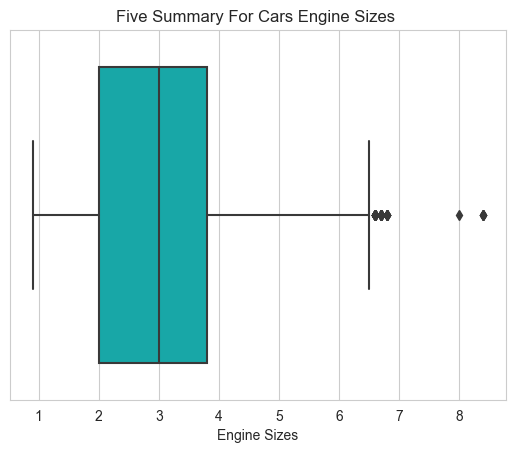

In [12]:

sns.set_style('whitegrid')
sns.boxplot(x=cars_engine_sizes, color='c').set(title='Five Summary For Cars Engine Sizes ' ,xlabel="Engine Sizes")


### From the above chart, shows that the median engine size is 3 liters
It is noticed that the data has outliers

## What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [13]:
#What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

avg_fuel_consumption = cars.groupby("Fuel Type")[['Fuel Consumption Comb (L/100 km)']].mean().round(1).sort_values(by='Fuel Consumption Comb (L/100 km)' , ascending=True)

avg_fuel_consumption

,Fuel Consumption Comb (L/100 km)
Fuel Type,
D,8.5
X,10.2
Z,11.4
N,12.7
E,17.0


<Figure size 1600x400 with 0 Axes>

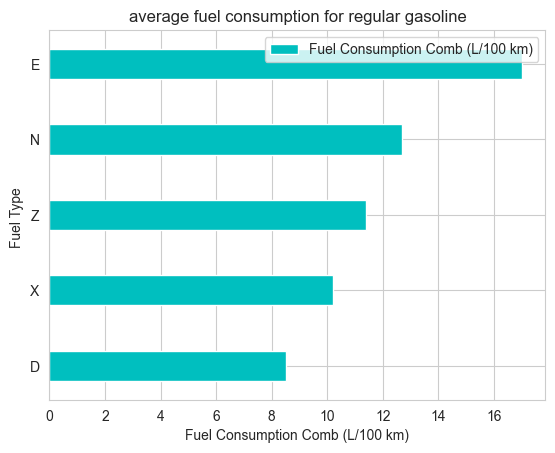

In [14]:
#sns.barplot(data=avg_fuel_consumption, x="Fuel Type", y="Fuel Consumption Comb (L/100 km)")
plt.figure(figsize=[16,4])
avg_fuel_consumption.plot(kind='barh',color="c",width =0.4)
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Fuel Type ")
plt.title("average fuel consumption for regular gasoline")
plt.show()

## What is the correlation between fuel consumption and CO2 emissions?

In [15]:
#What is the correlation between fuel consumption and CO2 emissions?
Coff_matrix = np.corrcoef(cars_fuel_consumption, cars_co2_emissions )

Coff_matrix 

array([[1.        , 0.91309853],
       [0.91309853, 1.        ]])

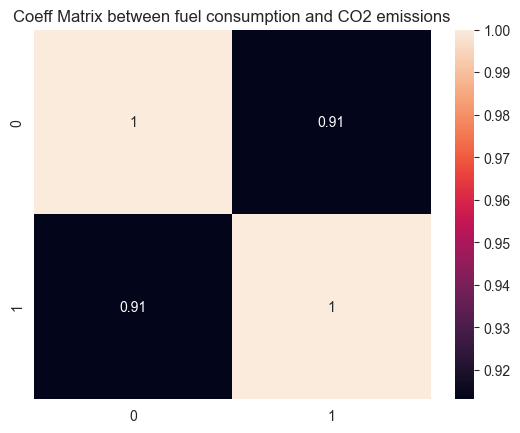

In [16]:
sns.heatmap(Coff_matrix , annot=True).set(title='Coeff Matrix between fuel consumption and CO2 emissions')
plt.show()

[Text(0.5, 1.0, 'Correlation between fuel consumption and CO2 emissions')]

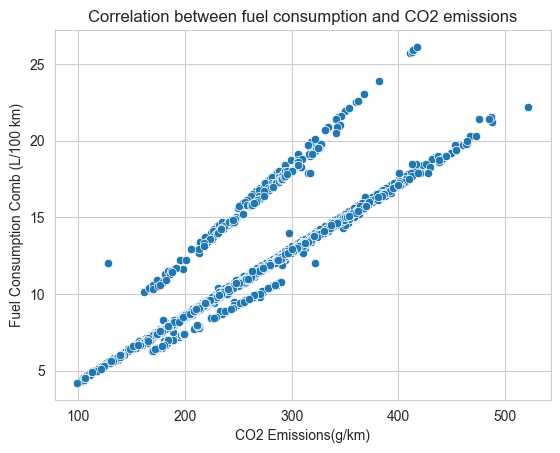

In [17]:
sns.scatterplot(cars,x="CO2 Emissions(g/km)", y="Fuel Consumption Comb (L/100 km)").set(title='Correlation between fuel consumption and CO2 emissions')

## We can see that the correlation coefficient between these two variables is 0.9, which is a positive correlation.
##   From the Scatter plot: The higher the fuel consumption, the higher the carbon dioxide emissions, and vice versa

## Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [18]:
#Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
filter_data=cars["Vehicle Class"].isin(["SUV - SMALL" , "MID-SIZE"])
#filter_data
avg_CO2_emissions_forvehicle = cars[filter_data].groupby("Vehicle Class")[['CO2 Emissions(g/km)']].mean().round(1).sort_values(by='CO2 Emissions(g/km)' , ascending=True)
avg_CO2_emissions_forvehicle 

,CO2 Emissions(g/km)
Vehicle Class,
MID-SIZE,223.2
SUV - SMALL,235.9


In [19]:
#avg_CO2_emissions_forvehicle.items
data = np.array( avg_CO2_emissions_forvehicle)
new_avg_CO2_emissions_vehicle= (data.astype(np.float)).flatten()
new_avg_CO2_emissions_vehicle

array([223.2, 235.9])

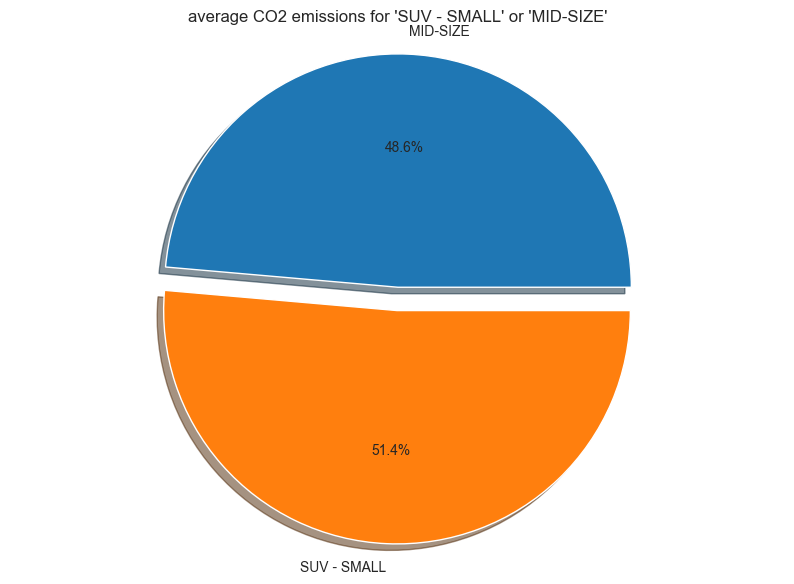

In [20]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0]
mylabels = ["MID-SIZE","SUV - SMALL"]
plt.pie(new_avg_CO2_emissions_vehicle,labels = mylabels,explode=myexplode ,autopct='%1.1f%%',shadow = True)

plt.title("average CO2 emissions for 'SUV - SMALL' or 'MID-SIZE'" )
plt.axis('equal')
plt.show() 

### The pie chart shows that "MID-SIZE" is the vehicle class that  has lower average CO2 emissions

## What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [21]:
#What are the average CO2 emissions for all vehicles? 
avg_CO2_emissions_allvehicles = cars.groupby("Vehicle Class")[['CO2 Emissions(g/km)']].mean().round(1).sort_values(by='CO2 Emissions(g/km)' , ascending=False)
avg_CO2_emissions_allvehicles


,CO2 Emissions(g/km)
Vehicle Class,
VAN - PASSENGER,393.7
VAN - CARGO,361.5
SUV - STANDARD,308.3
PICKUP TRUCK - STANDARD,302.7
TWO-SEATER,288.0
PICKUP TRUCK - SMALL,273.2
FULL-SIZE,265.6
MINIVAN,259.0
STATION WAGON - MID-SIZE,246.0


<Figure size 1600x400 with 0 Axes>

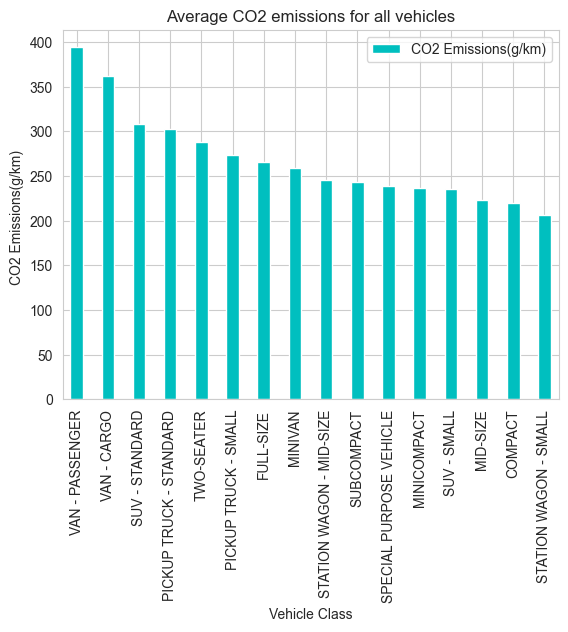

In [22]:
plt.figure(figsize=[16,4])
avg_CO2_emissions_allvehicles.plot(kind='bar',color="c",width =0.4)
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km) ")
plt.title("Average CO2 emissions for all vehicles")
plt.show()

### The bar chart shows that the "VAN-PASSENGER" is the Vehicle Class that has higher average CO2 emissions but the "STATION WAGON - SMALL" has the smaller average CO2 emissions

## Average CO2 emissions of For vehicles with an engine size of 2.0 liters or smaller?

In [23]:
#filter the dataframe to include only vehicles with engine size <= 2.0
small_engine_vehicles = cars[cars["Engine Size(L)"] <= 2.0]

small_engine_average= small_engine_vehicles.groupby("Vehicle Class")[["CO2 Emissions(g/km)"]].mean().round(1).sort_values(by='CO2 Emissions(g/km)' , ascending=False)

small_engine_average 

,CO2 Emissions(g/km)
Vehicle Class,
SUV - STANDARD,239.7
SPECIAL PURPOSE VEHICLE,234.7
SUV - SMALL,220.4
STATION WAGON - MID-SIZE,200.4
SUBCOMPACT,198.9
STATION WAGON - SMALL,196.9
FULL-SIZE,194.7
TWO-SEATER,194.0
COMPACT,191.6


<Figure size 1600x400 with 0 Axes>

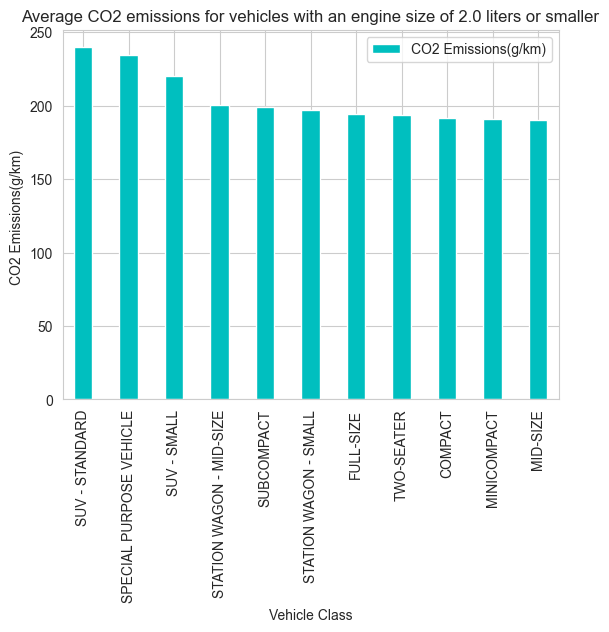

In [24]:
plt.figure(figsize=[16,4])
small_engine_average.plot(kind='bar',color="c",width =0.4)
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km) ")
plt.title("Average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller")
plt.show()

### The bar chart shows that the "SUV - STANDARD" is vehicle class with an engine size of 2.0 liters or smaller is the higher vehicle that produces CO2 emission more than any vehicle class, and the "MID-SIZE" is the least vehicle class that produce CO2 emission 

## What is the correlation between Engine size and CO2 emissions?

In [25]:
Coff_matrix = np.corrcoef(cars["Engine Size(L)"], cars_co2_emissions )

Coff_matrix 

array([[1.        , 0.86331523],
       [0.86331523, 1.        ]])

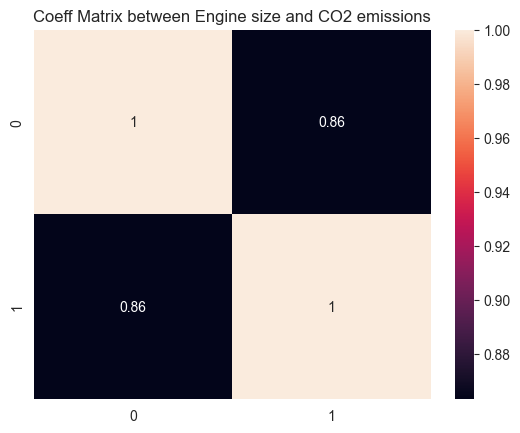

In [26]:
sns.heatmap(Coff_matrix , annot=True).set(title='Coeff Matrix between Engine size and CO2 emissions')
plt.show()

[Text(0.5, 1.0, 'Correlation between Engine size and CO2 emissions')]

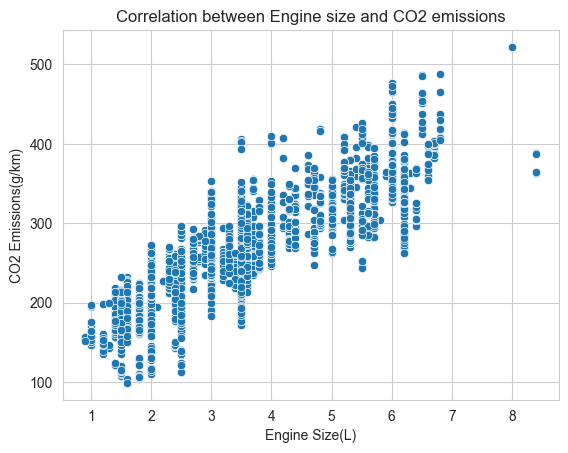

In [27]:
sns.scatterplot(cars,x="Engine Size(L)", y="CO2 Emissions(g/km)").set(title='Correlation between Engine size and CO2 emissions')

### From the above two charts, we get that there is a positive correlation between engine size and CO2 emission

##  What is the correlation between The number of cylinders and CO2 emissions?

In [28]:
Coff_matrix = np.corrcoef(cars["Cylinders"], cars_co2_emissions )

Coff_matrix 

array([[1.        , 0.83836419],
       [0.83836419, 1.        ]])

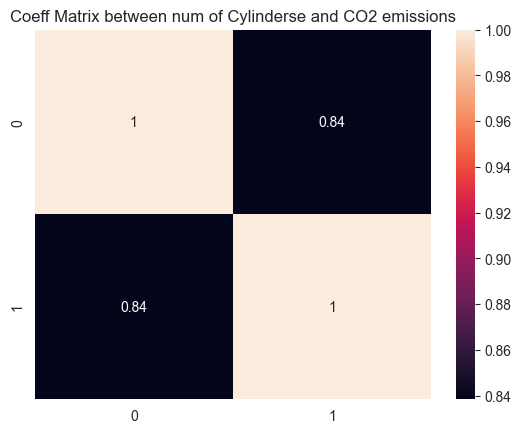

In [29]:
sns.heatmap(Coff_matrix , annot=True).set(title='Coeff Matrix between num of Cylinderse and CO2 emissions')
plt.show()

[Text(0.5, 1.0, 'Correlation between number of cylinders and CO2 emissions')]

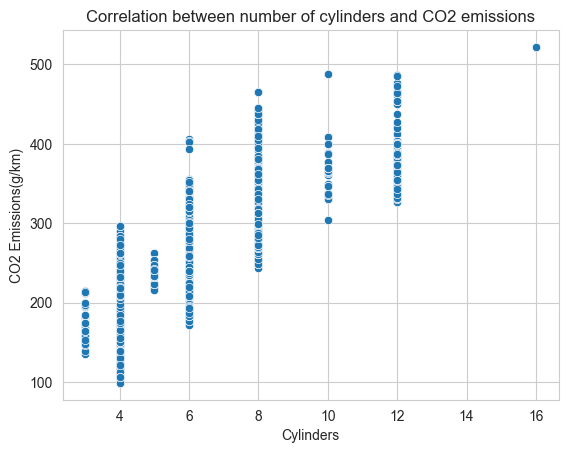

In [30]:
sns.scatterplot(cars,x="Cylinders", y="CO2 Emissions(g/km)").set(title='Correlation between number of cylinders and CO2 emissions')

### There is also a positive correlation between the number of cylinders and CO2 emissions

# Conclusion 

## 1-The "MID-SIZE" is the vehicle class that  has lower average CO2 emissions
## 2-The "STATION WAGON - SMALL" has the smaller average CO2 emissions
## 3-The CO2 emission is affected by multible factors such as :
## - Fuel consumption
## - Engine size
## - The number of cylinders
## 

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## A note on SQL
You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

It is also important to note that the database used in this challenge is a slightly different version (SQL Server) from the one used in the Introduction to SQL course (PostgreSQL). You might notice that the keyword **LIMIT** does not exist in SQL Server.

In [31]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [32]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [33]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

# What is the most expensive item your company sells? The least expensive?

## what is The most expensive item that the company sells?

In [34]:

SELECT TOP 1 product_name, list_price
FROM products
ORDER BY list_price DESC




,product_name,list_price
0,Trek Domane SLR 9 Disc - 2018,11999.99


### Trek Domane SLR 9 Disc - 2018 is the most expensive product that the company sells with a price of "11999.99"

## what is The least expensive product that the company sells?

In [35]:
SELECT TOP 1 product_name, list_price
FROM products
ORDER BY list_price ASC

,product_name,list_price
0,Strider Classic 12 Balance Bike - 2018,89.99


### The "Strider Classic 12 Balance Bike - 2018" is the least expensive product that the company sells with a price of "89.99"

# How many different products of each category does your company sell?

In [36]:
SELECT categories.category_name, COUNT(DISTINCT products.product_id) as total_products
FROM products
JOIN categories ON products.category_id = categories.category_id
GROUP BY categories.category_name
order by total_products 

,category_name,total_products
0,Cyclocross Bicycles,10
1,Electric Bikes,24
2,Comfort Bicycles,30
3,Children Bicycles,59
4,Mountain Bikes,60
5,Road Bikes,60
6,Cruisers Bicycles,78


# What are the top three brands with the highest average list price? 

In [37]:
SELECT TOP 3 brands.brand_name, AVG(products.list_price) as avgerage_price
FROM products
JOIN brands ON products.brand_id = brands.brand_id
GROUP BY brands.brand_name
ORDER BY avgerage_price DESC


,brand_name,avgerage_price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


# What are The top three categories?

In [38]:
SELECT TOP 3 categories.category_name, AVG(products.list_price) as avgerage_price
FROM products
JOIN categories ON products.category_id = categories.category_id
GROUP BY categories.category_name
ORDER BY  avgerage_price DESC


,category_name,avgerage_price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000
